In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import pgeocode
import quandl

In [233]:
# import reference df for regions
region_df = pd.read_csv(r'C:\Users\jacheung\Dropbox\Datasets\Zillow\ZILLOW-REGIONS.csv')
indicators_df = pd.read_csv(r'C:\Users\jacheung\Dropbox\Datasets\Zillow\ZILLOW_INDICATORS.csv')

la_region_id = region_df[region_df['region'].str.contains('Los Angeles', regex=False)]
la_region_id.reset_index(drop=True,inplace=True)


In [278]:
# build a look up table for los angeles
# extract out zip codes
zipcode = [k.split(';')[0] for k in la_region_id['region'] if k.split(';')[0].isdigit()]
idx = [idx for idx,k in enumerate(la_region_id['region']) if k.split(';')[0].isdigit()]
la_lookup = la_region_id.loc[idx]
la_lookup['zipcode'] = zipcode

# transform zip codes to lat long
nomi = pgeocode.Nominatim('us')
def get_lat_long(zipcode):
    vals = nomi.query_postal_code(zipcode)
    return vals['latitude'], vals['longitude']

lat_long_raw = [get_lat_long(k) for k in la_lookup['zipcode']]
lat_long_insert =np.array([np.array(xi) for xi in lat_long])

la_lookup['latitude'] = lat_long_insert[:,0]
la_lookup['longitude'] = lat_long_insert[:,1]


AttributeError: 'str' object has no attribute 'type'

In [505]:
# build median home values across all zip codes using quandl API
quandl.ApiConfig.api_key = 'wX4VKujcwjcKqguwo1hR'
grouped_data = pd.DataFrame()
for region_id, zipcode in zip(la_lookup['region_id'],la_lookup['zipcode']):
    data = quandl.get_table('ZILLOW/DATA', indicator_id='ZSFH', region_id=str(region_id))
    data['date'] = data['date'].astype('datetime64[M]')
    data['value'] = data['value']/10**6
    group_data = data.groupby(by=['date']).aggregate('median').rename(columns = {'value':zipcode})
#     group_data = group_data.rename(columns = {'value':zipcode})
    grouped_data = pd.concat([grouped_data, group_data], axis=1)
    
grouped_data.reset_index(inplace=True)

In [523]:
from bokeh.plotting import figure
from bokeh.io import output_file,show
from bokeh.models import HoverTool, CategoricalColorMapper, ColumnDataSource
from bokeh.models.widgets import Tabs, Panel

source = ColumnDataSource(grouped_data)

p = figure(title = 'SFH house price', x_axis_type = 'datetime', 
           x_axis_label = 'Date', y_axis_label = 'House price in millions (USD)')

p.circle('date', '90047', source=source, size =3, color = 'red', legend='Westmont')
p.circle('date', '90010', source=source, size =3,color = 'blue')
p.circle('date', '90005', source=source, size =3,color = 'blue')
p.circle('date', '90006', source=source, size =3,color = 'blue', legend='Koreatown')

show(p)

In [522]:
pct_df = grouped_data.loc[:,grouped_data.columns != 'date'].copy()
pct_df = pct_df.pct_change(periods=12)*100
pct_df = pd.concat([grouped_data['date'],pct_df],axis=1)
pct_df.rename(columns={0:'date'}, inplace=True)

source = ColumnDataSource(pct_df)
p1 = figure(title = 'SFH house price', x_axis_type = 'datetime', 
           x_axis_label = 'Date', y_axis_label = 'Yearly percent change in house price')
p1.circle('date', '90047', source=source, size =3, color = 'red', legend = 'Westmont')
p1.circle('date', '90010', source=source, size =3,color = 'blue')
p1.circle('date', '90005', source=source, size =3,color = 'blue')
p1.circle('date', '90006', source=source, size =3,color = 'blue', legend = 'Koreatown')

show(p)

In [526]:
source = ColumnDataSource(grouped_data)

p = figure(title = 'SFH house price', x_axis_type = 'datetime', 
           x_axis_label = 'Date', y_axis_label = 'House price in millions (USD)')

p.circle('date', '90047', source=source, size =3, color = 'red', legend='Westmont')
p.circle('date', '90010', source=source, size =3,color = 'blue')
p.circle('date', '90005', source=source, size =3,color = 'blue')
p.circle('date', '90006', source=source, size =3,color = 'blue', legend='Koreatown')
p.legend.location = "top_left"

source = ColumnDataSource(pct_df)
p1 = figure(title = 'SFH house price', x_axis_type = 'datetime', 
           x_axis_label = 'Date', y_axis_label = 'Yearly percent change in house price')
p1.circle('date', '90047', source=source, size =3, color = 'red', legend = 'Westmont')
p1.circle('date', '90010', source=source, size =3,color = 'blue')
p1.circle('date', '90005', source=source, size =3,color = 'blue')
p1.circle('date', '90006', source=source, size =3,color = 'blue', legend = 'Koreatown')
p1.legend.location = "top_left"

tab1 = Panel(child=p, title='Median home values')
tab2 = Panel(child=p1, title='Yearly percent change')

# Create a Tabs layout: layout
layout = Tabs(tabs=[tab1, tab2])
show(layout)

In [519]:
pct_df*100

,93591,93563,93553,93552,93551,93550,93544,93543,93536,93535,...,90011,90010,90008,90007,90006,90005,90004,90003,90002,90001
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,6.762499,-4.677008,3.516877,5.873635,4.887621,6.672207,4.792696,5.206293,5.577625,6.353683,...,10.026731,-9.389618,11.161007,9.359566,4.175373,10.885513,12.351093,9.085835,8.570782,8.409294
291,6.689706,-4.982047,3.776649,6.805128,5.631230,7.445246,5.286069,6.199089,6.374875,7.036909,...,10.512152,-8.522748,10.779521,11.138865,4.677440,10.565454,12.627645,9.009492,9.001153,8.204235
292,5.957861,-9.807860,0.273777,6.281781,5.124503,6.632745,-0.544176,5.112522,5.905795,6.298274,...,9.289329,-13.450462,7.461381,6.491703,2.502191,7.531668,12.022007,6.890875,8.141586,6.742325
293,5.311913,-9.552474,0.647923,5.904824,4.675701,6.132291,-0.845442,5.131304,5.501410,5.786337,...,8.802536,-13.303908,5.877661,5.466855,0.555535,5.627518,10.648546,6.089888,7.366722,5.851808


In [432]:
grouped_data.set_index('date')

TypeError: 'list' object is not callable

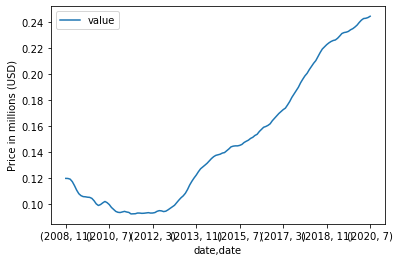

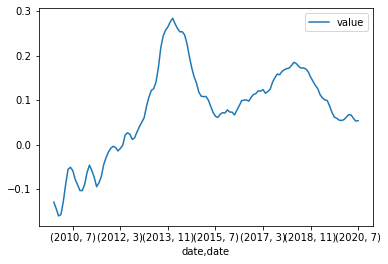

In [294]:

grouped_data.plot()
plt.ylabel('Price in millions (USD)')

grouped_data.pct_change(periods=12).plot()
